In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:\\Users\\ASUS\\Desktop\\titanic.csv')


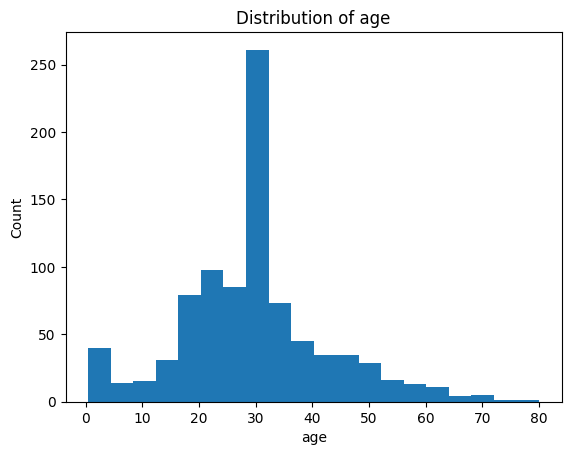

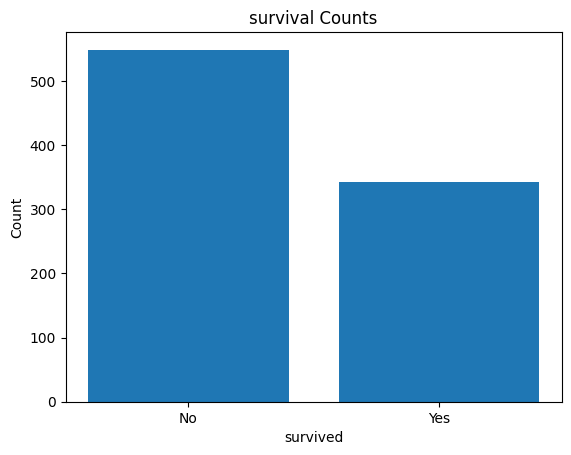

In [50]:
#Univariate Analysis
import matplotlib.pyplot as plt

# Plot a histogram of the 'Age' variable
plt.hist(df['age'], bins=20)
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Distribution of age')
plt.show()

# Plot a bar chart of the 'Survived' variable
survived_counts = df['survived'].value_counts()
plt.bar(survived_counts.index, survived_counts.values)
plt.xlabel('survived')
plt.ylabel('Count')
plt.title('survival Counts')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


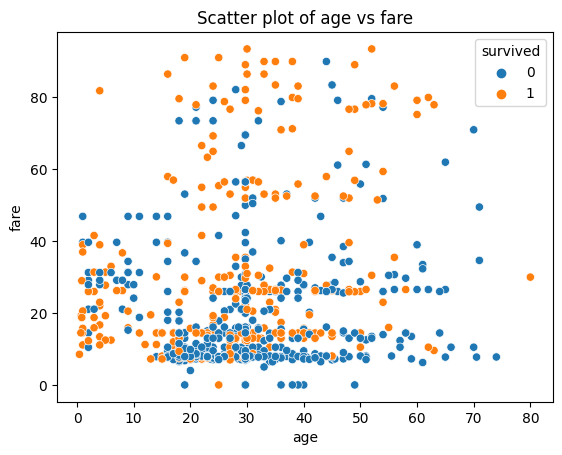

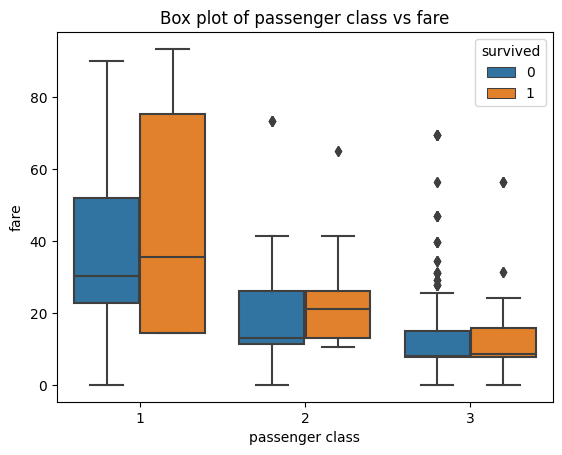

In [51]:
#Bi-Variate Analysis    
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of 'Age' vs 'Fare'
sns.scatterplot(data=df, x='age', y='fare', hue='survived')
plt.xlabel('age')
plt.ylabel('fare')
plt.title('Scatter plot of age vs fare')
plt.show()

# Box plot of 'Pclass' vs 'Fare'
sns.boxplot(data=df, x='pclass', y='fare', hue='survived')
plt.xlabel('passenger class')
plt.ylabel('fare')
plt.title('Box plot of passenger class vs fare')
plt.show()


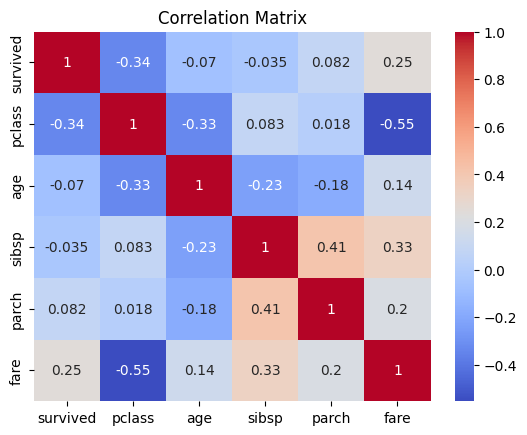

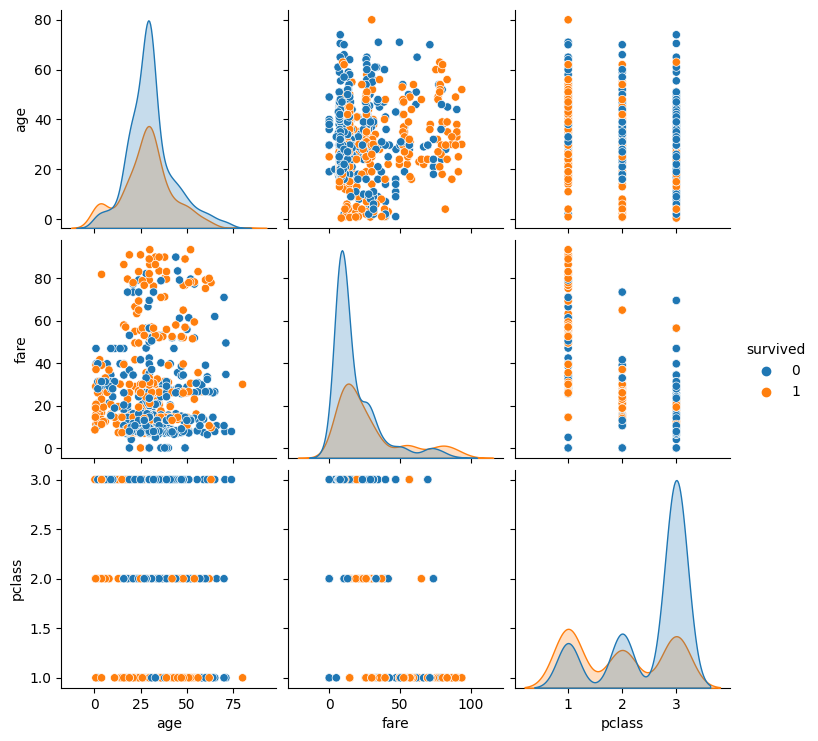

In [52]:
#Multi-Variate Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Remove non-numeric columns
numeric_columns = df.select_dtypes(include=[float, int]).columns
df_numeric = df[numeric_columns]

# Heatmap of correlation matrix
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Pair plot of select variables
select_vars = ['survived', 'age', 'fare', 'pclass']
sns.pairplot(df[select_vars], hue='survived')
plt.show()


In [5]:
# Descriptive statistics
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

# Handle missing values
# Fill missing values with the mean of 'age' column
df['age'].fillna(df['age'].mean(), inplace=True)

# Print the updated data
print("Updated data:")
print(df)


Missing values:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Updated data:
     survived  pclass     sex        age  sibsp  parch     fare embarked   
0           0       3    male  22.000000      1      0   7.2500        S  \
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000 

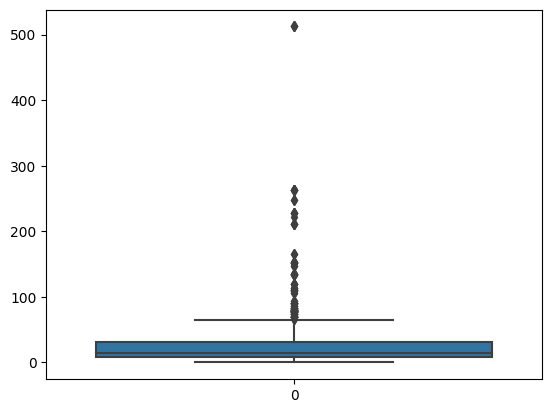

In [11]:
# Find outliers using box plots
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df['fare'])
plt.show()

# Replace outliers
threshold = 100
df.loc[df['fare'] > threshold, 'fare'] = df['fare'].median()



In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the categorical columns
categorical_cols = ['sex', 'embarked']

# Create the ColumnTransformer
ct = ColumnTransformer(
    [('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

# Perform one-hot encoding on the categorical features
X_encoded = ct.fit_transform(X)

# Print the encoded data
print("Encoded data:")
print(X_encoded)


Encoded data:
[[0.0 1.0 0.0 ... 'Southampton' 'no' False]
 [1.0 0.0 1.0 ... 'Cherbourg' 'yes' False]
 [1.0 0.0 0.0 ... 'Southampton' 'yes' True]
 ...
 [1.0 0.0 0.0 ... 'Southampton' 'no' False]
 [0.0 1.0 1.0 ... 'Cherbourg' 'yes' True]
 [0.0 1.0 0.0 ... 'Queenstown' 'no' True]]


In [42]:
import numpy as np
import pandas as pd

# Extract the target variable (dependent variable)
y = df['alive'].values

# Extract the independent variables
X = df.drop('alive', axis=1)

# Print the shapes of the dependent and independent variables
print("Shape of y:", y.shape)
print("Shape of X:", X.shape)


Shape of y: (891,)
Shape of X: (891, 14)


In [44]:
# Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Print the shape of X_scaled
print("X_scaled shape:", X_scaled.shape)

X_scaled shape: (891, 35)


In [47]:
#. Split the data into training and testing
import pandas as pd
from sklearn.model_selection import train_test_split



# Split the data into features (X) and target (y)
X = df.drop('survived', axis=1)
y = df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train/test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (712, 14) (712,)
Testing set shape: (179, 14) (179,)
